In [2]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [9]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.date.like('%-06-%')).all()


In [10]:
#  3. Convert the June temperatures to a list.
june = june_temps
june

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [11]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june, columns=['date','temperature'])
june_df


,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [378]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temperature
count,191.000000
mean,77.219895
std,2.622538
min,71.000000
25%,75.000000
50%,77.000000
75%,79.000000
max,83.000000


## D2: Determine the Summary Statistics for December

In [20]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.date.like('%-12-%')).all()

In [21]:
# 7. Convert the December temperatures to a list.
dec = dec_temps
dec

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [23]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec, columns=['date', 'temperature'])
dec_df

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [24]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [38]:
# query data for Jan 2017
jan_temps = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.date.like('%-01-%')).all()
jan_temps

[('2010-01-01', 65.0),
 ('2010-01-02', 63.0),
 ('2010-01-03', 74.0),
 ('2010-01-04', 76.0),
 ('2010-01-06', 73.0),
 ('2010-01-07', 70.0),
 ('2010-01-08', 64.0),
 ('2010-01-09', 68.0),
 ('2010-01-10', 73.0),
 ('2010-01-11', 64.0),
 ('2010-01-12', 61.0),
 ('2010-01-14', 66.0),
 ('2010-01-15', 65.0),
 ('2010-01-16', 68.0),
 ('2010-01-17', 64.0),
 ('2010-01-18', 72.0),
 ('2010-01-19', 66.0),
 ('2010-01-20', 66.0),
 ('2010-01-21', 69.0),
 ('2010-01-22', 67.0),
 ('2010-01-23', 67.0),
 ('2010-01-24', 71.0),
 ('2010-01-25', 67.0),
 ('2010-01-26', 76.0),
 ('2010-01-27', 68.0),
 ('2010-01-28', 72.0),
 ('2010-01-30', 70.0),
 ('2010-01-31', 67.0),
 ('2011-01-01', 69.0),
 ('2011-01-02', 72.0),
 ('2011-01-03', 74.0),
 ('2011-01-04', 73.0),
 ('2011-01-05', 64.0),
 ('2011-01-06', 65.0),
 ('2011-01-07', 68.0),
 ('2011-01-08', 62.0),
 ('2011-01-09', 58.0),
 ('2011-01-10', 73.0),
 ('2011-01-11', 60.0),
 ('2011-01-13', 68.0),
 ('2011-01-14', 76.0),
 ('2011-01-15', 68.0),
 ('2011-01-16', 66.0),
 ('2011-01-

In [39]:
jan = jan_temps
jan_df = pd.DataFrame(jan, columns = ['date', 'temp'])
jan_df.describe()

,temp
count,1727.000000
mean,68.726115
std,4.367892
min,54.000000
25%,66.000000
50%,69.000000
75%,72.000000
max,81.000000


In [40]:
may_temps = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.date.like('%-05-%')).all()
may_temps
may = may_temps
may_df = pd.DataFrame(may, columns = ['date', 'temp'])
may_df.describe()

,temp
count,1733.000000
mean,73.680900
std,3.355783
min,63.000000
25%,71.000000
50%,74.000000
75%,76.000000
max,87.000000


In [31]:
# additional queries for more data
temps_2017 = session.query(Measurement.date, Measurement.tobs).all()


In [37]:
temp_data_2017 = temps_2017
temps_2017_df = pd.DataFrame(temp_data_2017, columns = ['date', 'avg temp']).groupby(['date']).mean()
temps_2017_df.describe()

,avg temp
count,2792.000000
mean,73.199961
std,3.547865
min,59.285714
25%,71.000000
50%,73.625000
75%,75.678571
max,81.400000


In [33]:
import matplotlib.pyplot as plt

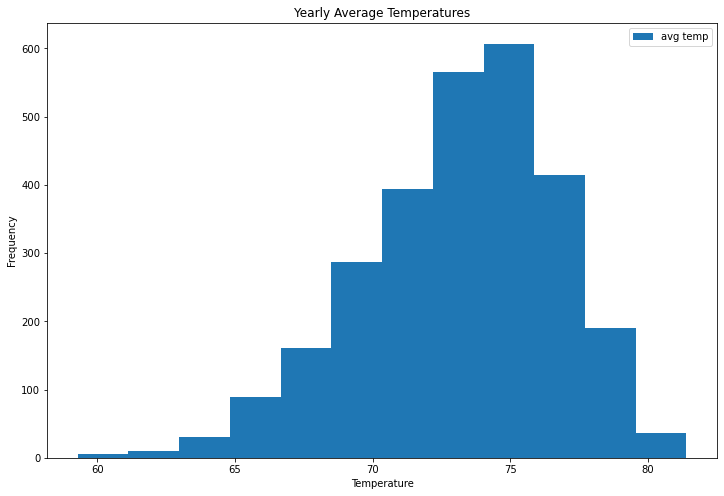

In [34]:
temps_2017_df.plot.hist(by ='temp', bins=12, figsize=(12,8))
plt.title("Yearly Average Temperatures")
plt.xlabel("Temperature")
plt.savefig("Yearly_Avg_Temps.png")

<function matplotlib.pyplot.show(close=None, block=None)>

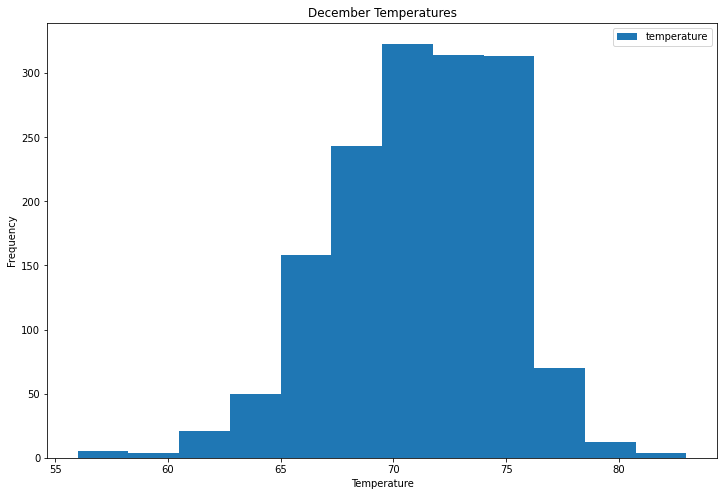

In [35]:


# plot dec_df
dec_df.plot.hist(by ='temp', bins=12, figsize=(12,8))
plt.title("December Temperatures")
plt.xlabel("Temperature")
plt.savefig("December_Hist.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

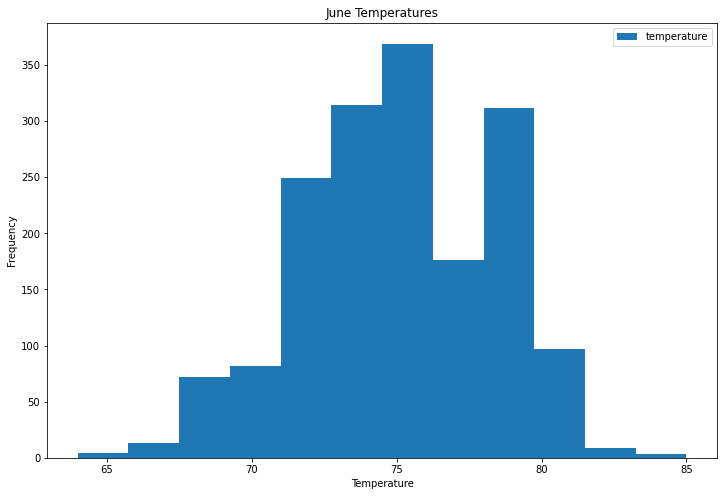

In [36]:
# plot june_df
june_df.plot.hist(by ='temp', bins=12, figsize=(12,8))
plt.title("June Temperatures")
plt.xlabel("Temperature")
plt.savefig("June_Hist.png")
plt.show